In [ ]:
# NEED TO HAVE DATA FILES DOWNLOADED AND UPDATE PATHS
import math
import numpy as np
from numpy import trapz
import pandas as pd
import matplotlib.pyplot as plt
from pseudo_xrr.gixos import *
from pseudo_xrr.data_io import *
#from pseudo_xrr.slit import Rectungular_slit
from pseudo_xrr.Dependency import *

from pyinstrument import Profiler

pyinstrument: the timer on your system has an overhead of 2613 nanoseconds,
which is considered high. You might experience longer runtimes than usual, and
programs with lots of pure-python code might be distorted.

You might want to try the timing thread option, which can be enabled using
--use-timing-thread at the command line, or by setting the use_timing_thread
parameter in the Profiler constructor.

If you want to suppress this warning, you can set the environment variable
PYINSTRUMENT_IGNORE_OVERHEAD_WARNING to '1'.
C:\Users\alexp\pyprojects\pseudo_xrr\pseudo_xrr\data_io.py:44: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  xrr_data               = pd.read_csv(


0.040000	0.060000	0.100000	0.150000	0.318000	metadata['DSqxyHW']: 0.006
metadata['qz_selected']: [0.1  0.3  0.35 0.4  0.6 ]
metadata['kappa_deviation']: 3
metadata['assume_kappa']: [0 6]
metadata['rho_b']: 9.42e-06


C:\Users\alexp\pyprojects\pseudo_xrr\pseudo_xrr\gixos.py:111: RuntimeWarning: divide by zero encountered in divide
  C_integrand[idx, :] = 2 * pi * r_grid**(1 - eta_val) * (np.exp(-eta_val * besselk(0, r_grid / Lk)) - 1)
C:\Users\alexp\pyprojects\pseudo_xrr\pseudo_xrr\gixos.py:114: RuntimeWarning: divide by zero encountered in scalar divide
  RRF_term = ((xi / kbT_gamma) * Rqxy_HWHM**eta + Rqxy_HWHM**2 * C / (4 * pi)) * (1 / qmax)**eta * np.exp(eta * besselk(0, 1 / (Lk * qmax)))
C:\Users\alexp\pyprojects\pseudo_xrr\pseudo_xrr\gixos.py:17: RuntimeWarning: divide by zero encountered in divide
  term2 = np.exp(-eta[..., None] * besselk(0, rad_term / Lk)) - 1
C:\Users\alexp\pyprojects\pseudo_xrr\pseudo_xrr\gixos.py:52: RuntimeWarning: divide by zero encountered in scalar divide
  exp_term = np.exp(eta * besselk(0, 1 / (Lk * qmax)))


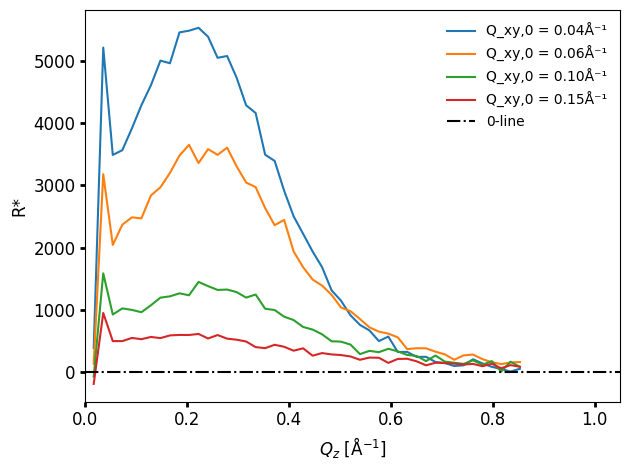

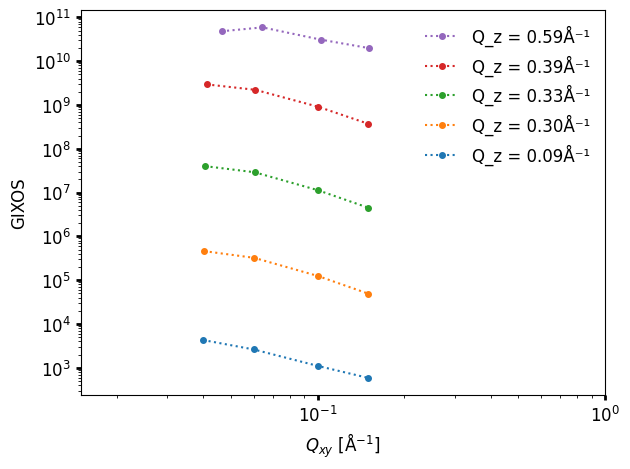

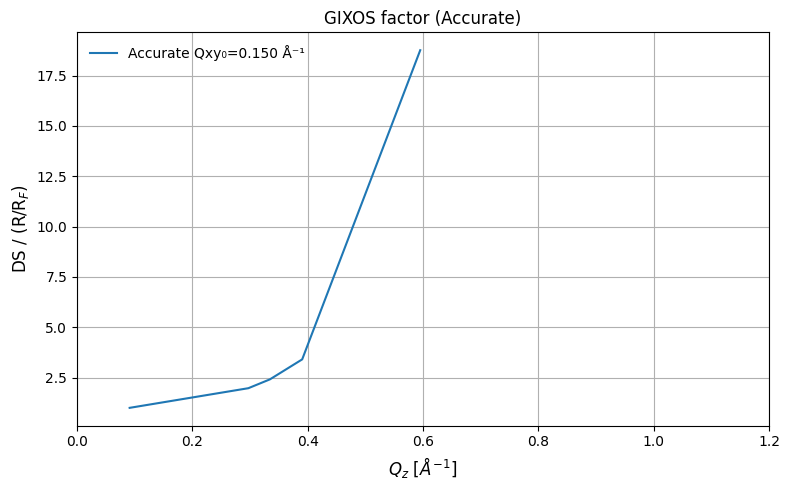


  _     ._   __/__   _ _  _  _ _/_   Recorded: 15:20:42  Samples:  1749
 /_//_/// /_\ / //_// / //_'/ //     Duration: 66.971    CPU time: 66.656
/   _/                      v5.0.3

Profile at C:\Users\alexp\AppData\Local\Temp\ipykernel_15460\137356425.py:2

66.976 <module>  ..\..\AppData\Local\Temp\ipykernel_15460\137356425.py:1
└─ 66.976 dependency_wrapper  pseudo_xrr\Dependency.py:3
   ├─ 65.831 create_dependency_models  pseudo_xrr\data_io.py:684
   │  └─ 65.828 calc_film_DS_RRF_integ  pseudo_xrr\gixos.py:85
   │     └─ 65.352 film_integral_delta_beta_delta_phi  pseudo_xrr\gixos.py:24
   │        ├─ 63.687 film_correlation_integrand_replacement  pseudo_xrr\gixos.py:13
   │        └─ 1.373 trapezoid  scipy\integrate\_quadrature.py:20
   └─ 0.675 dependency_plot  pseudo_xrr\plots.py:187




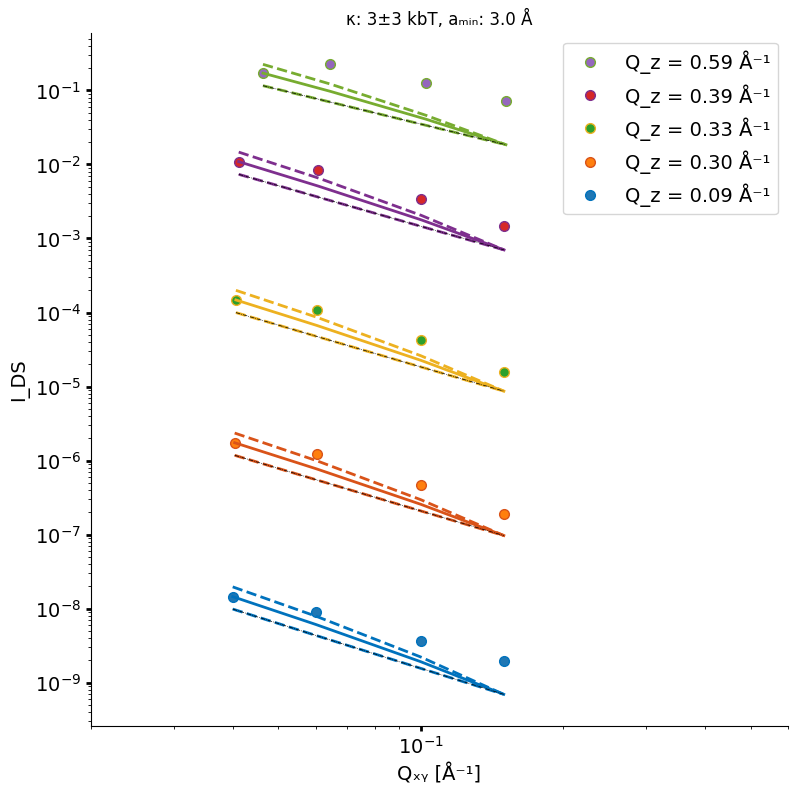

In [7]:
profiler = Profiler()
profiler.start()

dependency_wrapper('./testing_data/gixos_metadata.yaml')

profiler.stop()
profiler.print()

In [ ]:
import pseudo_xrr.data_io
print(dir(pseudo_xrr.data_io))

['GIXOS_RF_and_SF', 'GIXOS_Tsqr', 'GIXOS_dQz', 'GIXOS_data_plot', 'GIXOS_data_plot_prep', 'GIXOS_file_output', 'GIXOS_fresnel', 'R_data_plot', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '__warningregistry__', 'besselj', 'besselk', 'binning_GIXOS_data', 'calc_film_DS_RRF_integ', 'conversion_to_reflectivity', 'dblquad', 'film_integral_delta_beta_delta_phi', 'gamma', 'load_data', 'load_metadata', 'math', 'np', 'os', 'pd', 'real_space_2theta', 'rect_slit_function', 'rectangular_slit', 'remove_negative_2theta', 'yaml']


In [ ]:
importGIXOSdata, importbkg = load_data('./testing_data/gixos_metadata.yaml')
metadata = load_metadata('./testing_data/gixos_metadata.yaml')

0.040000	0.060000	0.100000	0.150000	0.318000	

C:\Users\alexp\pyprojects\pseudo_xrr\pseudo_xrr\data_io.py:44: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  xrr_data               = pd.read_csv(


In [ ]:
metadata["qxy0"][ metadata["qxy0_select_idx"] ]

np.float64(0.04)

In [ ]:
importGIXOSdata, importbkg = binning_GIXOS_data(importGIXOSdata, importbkg)

0.040000	0.060000	0.100000	0.150000	0.318000	

C:\Users\alexp\pyprojects\pseudo_xrr\pseudo_xrr\data_io.py:44: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  xrr_data               = pd.read_csv(


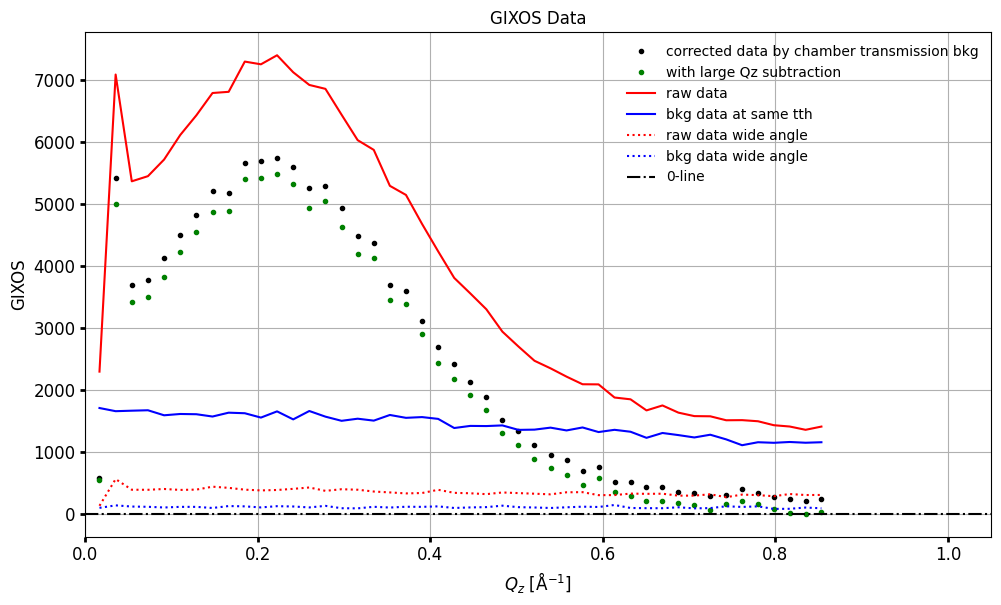

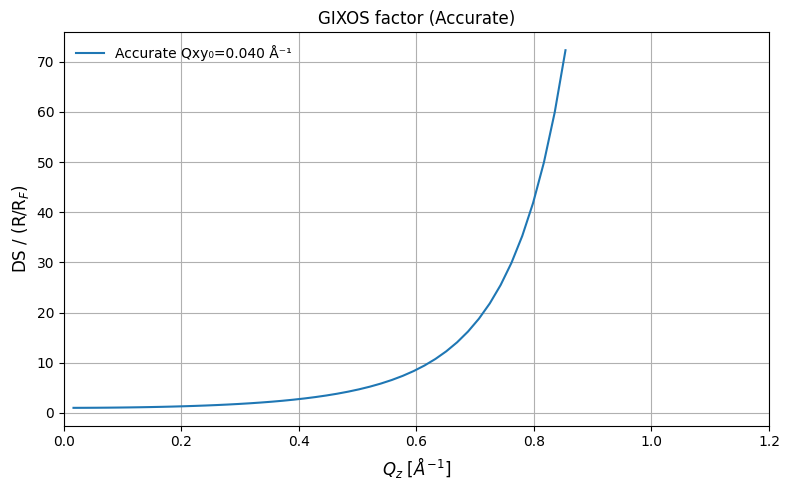

C:\Users\alexp\pyprojects\pseudo_xrr\pseudo_xrr\data_io.py:346: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  xrr_data = pd.read_csv(metadata["path_xrr"] + metadata["xrr_datafile"], delim_whitespace=True)


xrr_config keys: dict_keys(['energy', 'sdd', 'slit_h', 'slit_v', 'wavelength', 'wave_number', 'Qz', 'dataQz', 'beta_xrr', 'dataRF', 'RF', 'kbT_gamma', 'eta', 'delta_phi_HW', 'delta_beta_HW', 'slit_h_coord', 'slit_v_coord', 'slit_t', 'slit_b', 'slit_l', 'slit_r', 'slit_coord', 'qxy_slit', 'qxy_slit_min', 'ang', 'qxy_slit_min_coord', 'phi_max_qxy_slit_min', 'phi_array_for_qxy_slit_min', 'delta_beta_array_for_qxy_slit_min', 'bkgoff', 'bkg_phi', 'r_step', 'r', 'C_integrand', 'C', 'qxy_slit_min_flat', 'RRF_term', 'specular_qxy_min', 'region_around_radial_u_r', 'region_around_radial_l_r', 'diff_r', 'diff_r_bkgoff', 'Rterm_rect_slit', 'bkgterm_rect_slit'])
{'energy': 14400, 'sdd': 1039.9, 'slit_h': 1, 'slit_v': 0.66, 'wavelength': 0.8611111111111112, 'wave_number': 7.296602292208552, 'Qz': array([0.01632588, 0.03505133, 0.05377634, 0.07250059, 0.09122372,
       0.10994533, 0.12866503, 0.14738251, 0.16609733, 0.18480919,
       0.20351767, 0.22222242, 0.24092307, 0.25961927, 0.2783106 ,
     

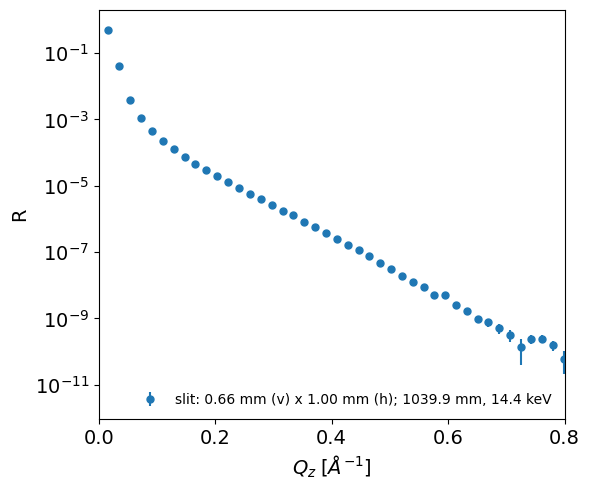

c:\Users\alexp\miniconda3\envs\pseudo_xrr_env\lib\site-packages\matplotlib\cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\alexp\miniconda3\envs\pseudo_xrr_env\lib\site-packages\matplotlib\cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
c:\Users\alexp\miniconda3\envs\pseudo_xrr_env\lib\site-packages\numpy\ma\core.py:3463: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval


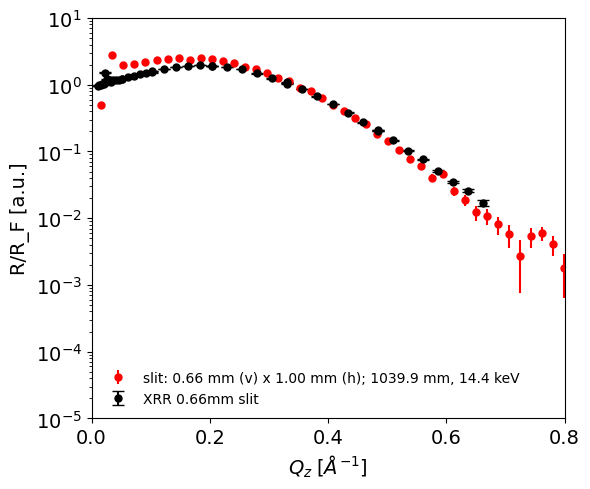


  _     ._   __/__   _ _  _  _ _/_   Recorded: 15:22:47  Samples:  98016
 /_//_/// /_\ / //_// / //_'/ //     Duration: 139.750   CPU time: 139.094
/   _/                      v5.0.3

Profile at C:\Users\alexp\AppData\Local\Temp\ipykernel_15460\2270335553.py:2

139.749 <module>  ..\..\AppData\Local\Temp\ipykernel_15460\2270335553.py:1
└─ 139.749 rectangular_slit  pseudo_xrr\data_io.py:618
   ├─ 106.224 rect_slit_function  pseudo_xrr\data_io.py:345
   │  └─ 105.500 dblquad  scipy\integrate\_quadpack_py.py:678
   │        [7 frames hidden]  scipy
   │           105.018 _quad  scipy\integrate\_quadpack_py.py:588
   │           ├─ 50.644 <lambda>  pseudo_xrr\data_io.py:436
   │           │  └─ 50.289 film_integral_delta_beta_delta_phi  pseudo_xrr\gixos.py:24
   │           │     ├─ 34.824 film_correlation_integrand_replacement  pseudo_xrr\gixos.py:13
   │           │     ├─ 7.543 [self]  pseudo_xrr\gixos.py
   │           │     ├─ 5.310 trapezoid  scipy\integrate\_quadrature.py:20
   │   

In [8]:
profiler = Profiler()
profiler.start()

rectangular_slit()   # add text pathway parameter

profiler.stop()
profiler.print()

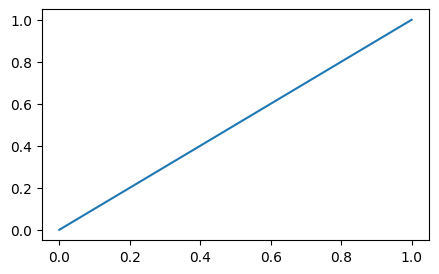

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 3))
plt.plot([0, 1], [0, 1])
plt.show()

In [ ]:
print(plt)

<module 'matplotlib.pyplot' from 'c:\\Users\\alexp\\miniconda3\\envs\\pseudo_xrr_env\\lib\\site-packages\\matplotlib\\pyplot.py'>


In [ ]:
metadata["RFscaling"]

22.942483292886546

In [ ]:
binsize = 10
groupnumber =  math.floor(importGIXOSdata ["Intensity"].shape[0] / binsize)      # look at the first row with .shape[0]
num_columns = importGIXOSdata["Intensity"].shape[1]

binneddata = None
binnedbkg = None

for groupidx in range(groupnumber): # why can't we just round up before if we are adding 1 to it?
    start = groupidx * binsize
    end = (groupidx + 1) * binsize
   
    if binneddata is None:
        binneddata = {
        "Intensity": np.zeros((groupnumber, num_columns)),
        "error": np.zeros((groupnumber, num_columns)),
        "tt": np.zeros(groupnumber),
    } 

    binneddata ["Intensity"][groupidx, :] = np.sum(importGIXOSdata ["Intensity"][start:end, :], axis=0)
    binneddata ["error"][groupidx, :] = np.sqrt(np.sum(importGIXOSdata ["error"][start:end, :]**2, axis=0))
    binneddata ["tt"][groupidx] = np.mean(importGIXOSdata ["tt"][start:end])

    if binnedbkg is None:
        binnedbkg = {
        "Intensity": np.zeros((groupnumber, num_columns)),
        "error": np.zeros((groupnumber, num_columns)),
        "tt": np.zeros((groupnumber, 1)),
    }
    binnedbkg ["Intensity"][groupidx, :] = np.sum(importbkg ["Intensity"][start:end, :], axis=0)
    binnedbkg ["error"][groupidx, :] = np.sqrt(np.sum(importbkg ["error"][start:end, :]**2, axis=0))
    binnedbkg ["tt"][groupidx, :] = np.mean(importbkg ["tt"][start:end], axis=0)    # no [ , :] because would index through all columns but we only have 1 in ["tt"]

importGIXOSdata = binneddata
importbkg = binnedbkg

# binneddata ["tt"] is meant to be a 1D array, but is showing a 2D one; correct value but in multiple columns - fixed
# binneddata ["error"] is simply wrong values
# ~~~~ Should match up with MATLAB outputs ~~~~~
#print(importGIXOSdata)

In [ ]:
tt_step = np.mean(importGIXOSdata ["tt"][1:] - importGIXOSdata ["tt"][0:-1])
indices =  np.where(importGIXOSdata ["tt"] < 0)[0] # finding indices where value stored is less than 0
tt_start_idx = indices[-1] if len(indices) > 0 else None  # taking the last  value of indices, and checking if indices is a valid list to take from

importGIXOSdata["Intensity"] = importGIXOSdata["Intensity"][tt_start_idx+1 :,:]
importGIXOSdata["error"] = importGIXOSdata["error"][tt_start_idx+1 :,:]
importGIXOSdata["tt"] = importGIXOSdata["tt"][tt_start_idx+1 :]
importbkg["Intensity"] = importbkg["Intensity"][tt_start_idx+1 :,:]
importbkg["error"] = importbkg["error"][tt_start_idx+1 :,:]
importbkg["tt"] = importbkg["tt"][tt_start_idx+1 :]  # in essence, we are removing the first rows of the data that have negative tt values

In [ ]:
tth = np.degrees(np.arcsin(qxy0[qxy0_select_idx] * wavelength / 4 / np.pi)) * 2          # math.asin would work if not a list
tth_roiHW_real = np.degrees(pixel * DSpxHW / Ddet)
DSqxyHW_real = np.radians(tth_roiHW_real) / 2 * 4 * np.pi / wavelength * np.cos(np.radians(tth/2))

# columns_GIXOS = ["tt", "Qxy", "Qz", ]
# GIXOS = pd.DataFrame(columns = columns_GIXOS) # does not work for what needs to be done ////////////// fix later
# GIXOS["tt"] = importGIXOSdata["tt"]
# DSbetaHW = np.mean(GIXOS ["tt"][1:] - GIXOS ["tt"][0:-1]) / 2
#Same as MATLAB

In [ ]:
GIXOS = {
    "tt": importGIXOSdata["tt"],
    "GIXOS_raw": importGIXOSdata["Intensity"] [:, qxy0_select_idx],
    "GIXOS_bkg": importbkg["Intensity"] [:, qxy0_select_idx]
}
DSbetaHW = np.mean(GIXOS["tt"][1:] - GIXOS["tt"][0:-1]) / 2
qxy0_idx = np.where(qxy0 > qxy_bkg)
qxy0_idx = qxy0_idx[0]
if len(qxy0_idx) == 0:
    qxy0_idx = [len(qxy0) + 1]
GIXOS["Qxy"] = 2 * np.pi / wavelength * np.sqrt((np.cos(np.radians(GIXOS["tt"])) * np.sin(np.radians(tth)))**2 + (np.cos(np.radians(alpha_i)) - np.cos(np.radians(GIXOS["tt"])) * np.cos(np.radians(tth)))**2)
GIXOS["Qz"] = 2 * np.pi / wavelength * (np.sin(np.radians(GIXOS["tt"])) + np.sin(np.radians(alpha_i)))
GIXOS["GIXOS_raw"] = importGIXOSdata["Intensity"] [:, qxy0_select_idx]
GIXOS["GIXOS_bkg"] = importbkg["Intensity"] [:, qxy0_select_idx]
if qxy0_idx[0] <= len(qxy0):
    GIXOS_raw_largetth = np.mean(importGIXOSdata["Intensity"][:, int(qxy0_idx):], axis = 1)
    GIXOS_bkg_largetth = np.mean(importbkg["Intensity"][:, int(qxy0_idx):], axis = 1)
    bulkbkg = GIXOS_raw_largetth - GIXOS_bkg_largetth
else:
    bulkbkg = np.zeros(len(qxy0))

fdtt = np.radians(tt_step) / (np.arctan((np.tan(np.radians(GIXOS ["tt"]))*Ddet + pixel/2)/Ddet) - np.arctan((np.tan(np.radians(GIXOS ["tt"]))*Ddet - pixel / 2) / Ddet))
fdtt = fdtt / fdtt [0]

GIXOS["GIXOS"] = (GIXOS ["GIXOS_raw"] - GIXOS ["GIXOS_bkg"]) * fdtt - bulkbkg * fdtt
GIXOS["error"] = np.sqrt(importGIXOSdata["error"][:, qxy0_select_idx]**2 + importbkg["error"][:, qxy0_select_idx]**2) * fdtt
# fdtt is off & unknown how will react if none for qxy0_idx
# GIXOS["GIXOS"] & GIXOS["error"] are not the same as MATLAB outputs
#print(GIXOS["GIXOS_raw"])
print(qxy0_idx)
print(qxy0_idx[0])

[4]
4


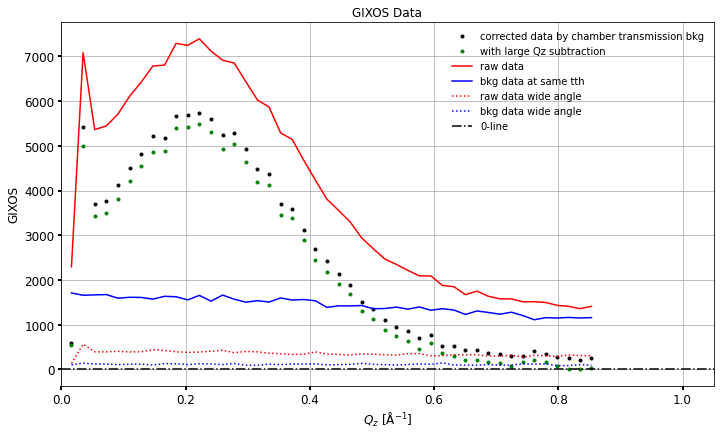

In [ ]:
# is the close plot command needed here?
import os

plt.figure(figsize = (10, 6))
plt.plot(GIXOS["Qz"], GIXOS["GIXOS_raw"] - GIXOS["GIXOS_bkg"], 'ko', markersize=3, label='corrected data by chamber transmission bkg')
plt.plot(GIXOS["Qz"], GIXOS["GIXOS"], 'go', markersize=3, label='with large Qz subtraction')
plt.plot(GIXOS["Qz"], GIXOS["GIXOS_raw"], 'r-', linewidth=1.5, label='raw data')
plt.plot(GIXOS["Qz"], GIXOS["GIXOS_bkg"], 'b-', linewidth=1.5, label='bkg data at same tth')
plt.plot(GIXOS["Qz"], GIXOS_raw_largetth, 'r:', linewidth=1.5, label='raw data wide angle')
plt.plot(GIXOS["Qz"], GIXOS_bkg_largetth, 'b:', linewidth=1.5, label='bkg data wide angle')
plt.axhline(0, color='k', linestyle='-.', linewidth=1.5, label='0-line')

# --- Show legend and display
plt.legend()
plt.xlabel("Qz")
plt.ylabel("Intensity")
plt.title("GIXOS Data")
plt.grid(True)
plt.tight_layout()

plt.xlim([0, 1.05])
ax = plt.gca()

ax.set_xlabel(r'$Q_z$ [$\mathrm{\AA}^{-1}$]', fontsize=12)  # Qz with angstrom symbol
ax.set_ylabel('GIXOS', fontsize=12)

ax.set_xticks(np.arange(0, 1.01, 0.2))  # same as 0:0.2:1
ax.tick_params(axis='both', labelsize=12, width=2, direction='out')

plt.legend(loc='upper right', frameon=False)  # 'NorthEast' => 'upper right'

# --- Save figure
filename = f"{sample}_{qxy0_select_idx:05d}_GIXOS.jpg"
save_path = os.path.join(path_out, filename)
plt.savefig(save_path, dpi=300)
plt.show()


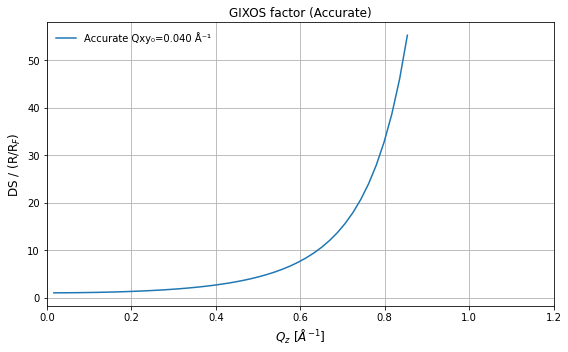

In [ ]:
# NEED TO HAVE FUNCTIONS DEFINED - SEE CHEN'S CODE FOR THE FUNCTIONS

fresnel = GIXOS_fresnel(GIXOS ["Qz"], Qc) # check if fresnel == GIXOS_fresnel      SAME
Qz_array = np.asarray(GIXOS ["Qz"]).reshape(-1, 1) # done to convert GIXOS ["Qz"] from a row vetor to a column vector for GIXOS_Tsqr
transmission = GIXOS_Tsqr(Qz_array, Qc, energy, alpha_i, Ddet, footprint)  #  Mostly the same, but the 4th column starts to deviate from the MATLAB output by hundredths
dQz = GIXOS_dQz(GIXOS["Qz"], energy, alpha_i, Ddet, footprint)     # Almost same, just not iterating through enough times(?) --> missing last row      SAME now

GIXOS["DS_RRF_integ"], GIXOS["DS_term_integ"], GIXOS["RRF_term_integ"] = calc_film_DS_RRF_integ(GIXOS ["tt"], qxy0 [qxy0_select_idx], energy/1000, alpha_i, RqxyHW, DSqxyHW_real, DSbetaHW, tension, temperature, kappa, amin, use_approx=False)
# DS = Diffuse Scatter; RRF = Specular Reflectivity Normalized by Fresnel Reflectivity
# Approx form is derived from Taylor expansion, which is dependent on being close to 0 angle --> higher deviations at high angles

GIXOS["refl"] = np.column_stack([
    GIXOS["Qz"],
    GIXOS["GIXOS"] / GIXOS["DS_RRF_integ"] * fresnel[:, 1] / transmission[:, 3],
    GIXOS["error"] / GIXOS["DS_RRF_integ"] * fresnel[:, 1] / transmission[:, 3],
    dQz[:, 4]
])

GIXOS["SF"] = np.column_stack([
    GIXOS["Qz"],
    GIXOS["GIXOS"] / GIXOS["DS_term_integ"] / transmission[:, 3],
    GIXOS["error"] / GIXOS["DS_term_integ"] / transmission[:, 3],
    dQz[:, 4]
])

In [ ]:
from scipy.integrate import dblquad # equivalent to integrate2() in MATLAB
#from numba import njit

xrr_config_energy = 14400

xrr_config_sdd = 1039.9
xrr_config_slit_h = 1
xrr_config_slit_v = 0.66 # not meant to be 1? - See MATLAB ig

xrr_config_wavelength = 12400/xrr_config_energy
xrr_config_wave_number = 2 * np.pi / xrr_config_wavelength
xrr_config_Qz = GIXOS["Qz"]
xrr_config_dataQz = xrr_data.iloc[:, 0].astype(float).to_numpy()  # see later bc accessing data !!!!!!!!!!!!!!!!!!!  might have bugs bc came out as strings and need to convert to float
xrr_config_beta_xrr = np.degrees(np.arcsin(xrr_config_Qz / 2 / xrr_config_wave_number))
xrr_config_beta_xrr = xrr_config_beta_xrr.reshape(-1, 1) # do this, otherwise beta_xrr has shape (46,) instead of (46, 1) which will mess up xrr_config_phi_array_for_qxy_slit_min and make it (46, 46) instead of (46, 1) like MATLAB code
xrr_config_dataRF = (( xrr_config_dataQz - np.lib.scimath.sqrt(xrr_config_dataQz**2 - Qc**2)) / (xrr_config_dataQz + np.lib.scimath.sqrt(xrr_config_dataQz**2 - Qc**2))) * np.conj((xrr_config_dataQz - np.lib.scimath.sqrt(xrr_config_dataQz**2 - Qc**2)) / (xrr_config_dataQz + np.lib.scimath.sqrt(xrr_config_dataQz**2 - Qc**2)))
xrr_config_RF = fresnel[:, 1]
xrr_config_kbT_gamma = kb * temperature / tension * 10 ** 20
xrr_config_eta = xrr_config_kbT_gamma / 2 / np.pi * xrr_config_Qz ** 2
# maybe delete xrr_config for simplicity
xrr_config_delta_phi_HW = np.degrees(np.arctan(xrr_config_slit_h / 2 / xrr_config_sdd / np.cos(np.radians(xrr_config_beta_xrr))))
xrr_config_delta_beta_HW =   np.degrees(np.arcsin(xrr_config_slit_v / 2 / xrr_config_sdd * np.cos(np.radians(xrr_config_beta_xrr))))

xrr_config_slit_h_coord = np.arange(-xrr_config_slit_h / 2, xrr_config_slit_h / 2 + 0.005, 0.005)
xrr_config_slit_v_coord = np.arange(-xrr_config_slit_v / 2, xrr_config_slit_v / 2 + 0.005, 0.005)
xrr_config_slit_t = np.column_stack((xrr_config_slit_h_coord, np.ones(len(xrr_config_slit_h_coord)) * xrr_config_slit_v / 2))  
xrr_config_slit_b = np.column_stack((xrr_config_slit_h_coord, np.ones(len(xrr_config_slit_h_coord)) * -xrr_config_slit_v / 2))
xrr_config_slit_l = np.column_stack((np.ones(len(xrr_config_slit_v_coord)) * -xrr_config_slit_h / 2, xrr_config_slit_v_coord))
xrr_config_slit_r = np.column_stack((np.ones(len(xrr_config_slit_v_coord)) * xrr_config_slit_h / 2, xrr_config_slit_v_coord))
xrr_config_slit_coord = np.concatenate((xrr_config_slit_t, xrr_config_slit_r, np.flipud(xrr_config_slit_b), np.flipud(xrr_config_slit_l)), axis = 0)
xrr_config_qxy_slit = np.zeros( (xrr_config_slit_coord.shape[0], 2, xrr_config_beta_xrr.shape[0]) )
xrr_config_qxy_slit_min = np.zeros( (xrr_config_beta_xrr.shape[0], 1) )
xrr_config_ang = np.arange(0, 2 * np.pi, 0.01)
#xrr_config_ang = xrr_config_ang.reshape(-1, 1)  # transposing to make it a column vector
xrr_config_qxy_slit_min_coord = np.zeros( (xrr_config_ang.shape[0], 2, xrr_config_qxy_slit_min.shape[0]))
for idx in range(len(xrr_config_beta_xrr)):
    xrr_config_qxy_slit[:, :, idx] = xrr_config_wave_number * np.column_stack([xrr_config_slit_coord[:, 0] / xrr_config_sdd, xrr_config_slit_coord[:, 1] / xrr_config_sdd * np.sin(np.radians(xrr_config_beta_xrr[idx]))])
    xrr_config_qxy_slit_min[idx, 0] = np.min(np.sqrt(xrr_config_qxy_slit[:, 0, idx]**2 + xrr_config_qxy_slit[:, 1, idx]**2))
    xrr_config_qxy_slit_min_coord[:, :, idx] = xrr_config_qxy_slit_min[idx] * np.column_stack([np.cos(xrr_config_ang), np.sin(xrr_config_ang)])  # might not need np.array

xrr_config_phi_max_qxy_slit_min = np.degrees(np.arctan(xrr_config_qxy_slit_min / xrr_config_wave_number / np.cos(np.radians(xrr_config_beta_xrr))))

xrr_config_phi_array_for_qxy_slit_min = xrr_config_phi_max_qxy_slit_min * np.array([0, 1/5, 2/5, 3/5, 4/5])
xrr_config_delta_beta_array_for_qxy_slit_min = np.degrees(
    np.arcsin(
        (np.sqrt(
            np.maximum(xrr_config_qxy_slit_min[:, 0:1]**2 - 
                       (np.tan(np.radians(xrr_config_phi_array_for_qxy_slit_min)) * 
                        np.cos(np.radians(xrr_config_beta_xrr)) * 
                        xrr_config_wave_number) ** 2, 0))
         / (xrr_config_wave_number * np.sin(np.radians(xrr_config_beta_xrr))))
        * np.cos(np.radians(xrr_config_beta_xrr))
    )
)

delta_beta_HW_1d = xrr_config_delta_beta_HW[:, 0]
for idx in range(xrr_config_delta_beta_array_for_qxy_slit_min.shape[1]):
    repidx = xrr_config_delta_beta_array_for_qxy_slit_min[:, idx] >= delta_beta_HW_1d
    xrr_config_delta_beta_array_for_qxy_slit_min[repidx, idx] = delta_beta_HW_1d[repidx]  # replace values that are greater than delta_beta_HW with delta_beta_HW

xrr_config_phi_array_for_qxy_slit_min = np.hstack([xrr_config_phi_array_for_qxy_slit_min, xrr_config_phi_max_qxy_slit_min]) # might not work with np.column_stack bc size mismatch --> column_hstack

xrr_config_bkgoff = 1
xrr_config_bkg_phi = np.degrees(np.arctan(xrr_config_bkgoff / (xrr_config_sdd * np.cos(np.radians(xrr_config_beta_xrr)))))   # off by ten thousandths place - supposed to get larger as index increases, but decreases instead?


xrr_config_r_step = 0.001
xrr_config_r = np.sqrt(np.maximum(np.arange(0.001, 8*round(Lk) + xrr_config_r_step, xrr_config_r_step) ** 2 + amin ** 2, 0))
xrr_config_C_integrand = np.zeros((len(xrr_config_Qz), len(xrr_config_r)))
for idx in range(len(xrr_config_Qz)):
    xrr_config_C_integrand[idx, :] = 2 * np.pi * xrr_config_r**(1 - xrr_config_eta[idx]) * (np.exp(-xrr_config_eta[idx] * besselk(0, xrr_config_r / Lk)) - 1)    # off by thousandths place
# Matches up till here

xrr_config_C = np.sum(xrr_config_C_integrand, axis = 1) * xrr_config_r_step
xrr_config_qxy_slit_min_flat = xrr_config_qxy_slit_min.flatten()  # (46,) so that RRF_term does not return a (46, 46) array since MATLAB returns a (46, 1)
xrr_config_RRF_term = (xrr_config_qxy_slit_min_flat ** xrr_config_eta + xrr_config_qxy_slit_min_flat ** 2 * xrr_config_C / 4 / np.pi) * (1/qmax) ** xrr_config_eta * np.exp(xrr_config_eta * besselk(0, 1 / Lk / qmax))
xrr_config_specular_qxy_min = xrr_config_RF * xrr_config_RRF_term # off by hundredths/thousandths

xrr_config_region_around_radial_u_r = np.zeros((len(xrr_config_beta_xrr), xrr_config_delta_beta_array_for_qxy_slit_min.shape[1]))    # off by ~5-8 thousandths
xrr_config_region_around_radial_l_r = np.zeros((len(xrr_config_beta_xrr), xrr_config_delta_beta_array_for_qxy_slit_min.shape[1]))    # off by ~5-8 thousandths
xrr_config_diff_r = np.zeros((len(xrr_config_beta_xrr), 1))    # VERY OFF
xrr_config_diff_r_bkgoff = np.zeros((len(xrr_config_beta_xrr), 1))    # VERY OFF

xrr_config_diff_r = xrr_config_diff_r.flatten()
xrr_config_diff_r_bkgoff = xrr_config_diff_r_bkgoff.flatten()

for idx in range(len(xrr_config_beta_xrr)):
    fun_film = lambda tt, tth: film_integral_approx_delta_beta_delta_phi(tt, tth, xrr_config_kbT_gamma, xrr_config_wave_number, xrr_config_beta_xrr[idx], Lk, amin)
    for phi_idx in range(xrr_config_delta_beta_array_for_qxy_slit_min.shape[1]):
        upper, _ = dblquad(lambda tth, tt: fun_film(tt, tth), (xrr_config_beta_xrr[idx] + xrr_config_delta_beta_array_for_qxy_slit_min[idx, phi_idx]), (xrr_config_beta_xrr[idx] + xrr_config_delta_beta_HW[idx]), lambda _: xrr_config_phi_array_for_qxy_slit_min[idx, phi_idx], lambda _: xrr_config_phi_array_for_qxy_slit_min[idx, phi_idx + 1], epsabs=1e-10 , epsrel=1e-6)
        xrr_config_region_around_radial_u_r[idx, phi_idx] = upper * (np.pi/180) ** 2 * (9.42e-6)**2 / np.sin(np.radians(xrr_config_beta_xrr[idx]))

        lower, _ = dblquad(lambda tth, tt: fun_film (tt, tth), (xrr_config_beta_xrr[idx] - xrr_config_delta_beta_HW[idx]), (xrr_config_beta_xrr[idx] - xrr_config_delta_beta_array_for_qxy_slit_min[idx, phi_idx]), lambda _: xrr_config_phi_array_for_qxy_slit_min[idx, phi_idx], lambda _: xrr_config_phi_array_for_qxy_slit_min[idx, phi_idx + 1], epsabs=1e-10, epsrel=1e-6)
        xrr_config_region_around_radial_l_r[idx, phi_idx] = lower * (np.pi/180)**2 * (9.42e-6)**2 / np.sin(np.radians(xrr_config_beta_xrr[idx]))

    # Run the integral
    result, _ = dblquad(
    func=fun_film,
    a = xrr_config_beta_xrr[idx] - xrr_config_delta_beta_HW[idx],
    b = xrr_config_beta_xrr[idx] + xrr_config_delta_beta_HW[idx],
    gfun=lambda beta: xrr_config_phi_max_qxy_slit_min[idx],
    hfun=lambda beta: xrr_config_phi_max_qxy_slit_min[idx] + xrr_config_delta_phi_HW[idx]
    )

# Store the result (second column, index 0 in Python)
    xrr_config_diff_r[idx] = (result * (np.pi / 180)**2 * (9.42e-6)**2 / np.sin(np.deg2rad(xrr_config_beta_xrr[idx])))
        
    result2, _ = dblquad(func=fun_film,
    a=xrr_config_beta_xrr[idx] - xrr_config_delta_beta_HW[idx],
    b=xrr_config_beta_xrr[idx] + xrr_config_delta_beta_HW[idx],
    gfun=lambda beta: xrr_config_bkg_phi[idx] - xrr_config_delta_phi_HW[idx],
    hfun=lambda beta: xrr_config_bkg_phi[idx] + xrr_config_delta_phi_HW[idx]
    )
    xrr_config_diff_r_bkgoff[idx] = diff_r_bkgoff = (result2 * (np.pi / 180)**2 * (9.42e-6)**2 / np.sin(np.deg2rad(xrr_config_beta_xrr[idx])))



xrr_config_Rterm_rect_slit = xrr_config_specular_qxy_min + 2*(np.sum(xrr_config_region_around_radial_u_r + xrr_config_region_around_radial_u_r, axis = 1) + xrr_config_diff_r)
xrr_config_bkgterm_rect_slit = xrr_config_diff_r_bkgoff

# integration might be wrong; Rterm seems close enough, but bkgterm is off by a lot


In [ ]:
numerator_scaling = (xrr_config_Rterm_rect_slit - xrr_config_bkgterm_rect_slit)
denominator = GIXOS["DS_term_integ"] * transmission[:, 3]  # Element-wise multiplication

refl_recSlit = np.column_stack([
    GIXOS["Qz"],
    GIXOS["GIXOS"] * numerator_scaling / denominator,
    GIXOS["error"] * numerator_scaling / denominator,
    dQz[:, 4]
])

refl_roughness_term = (xrr_config_Rterm_rect_slit - xrr_config_bkgterm_rect_slit) / xrr_config_RF
refl_roughness = np.sqrt(-np.log(refl_roughness_term) / GIXOS["Qz"]**2)
GIXOS["SF"] = np.column_stack([GIXOS["SF"], refl_roughness, refl_roughness_term])

In [ ]:
# Output file creation

# ---- FILE 1: Pseudo Reflectivity ----
xrrfilename = f"{path_out}{sample}_{scan[qxy0_select_idx]:05d}_R_PYTHON.dat"
with open(xrrfilename, 'w') as f:
    f.write(f"# files\n")
    f.write(f"sample file: {sample}-id{scan[qxy0_select_idx]}\n")
    f.write(f"background file: {bkgsample}-id{bkgscan[qxy0_select_idx]}\n")
    f.write(f"wide angle bkg at qxy0 = {qxy_bkg:.6f} /A\n")
    f.write(f"# geometry\n")
    f.write(f"energy [eV]: {energy:.2f}\n")
    f.write(f"incidence [deg]: {alpha_i}\n")
    f.write(f"footprint [mm]: {footprint:.1f}\n")
    f.write(f"sdd [mm]: {Ddet:.2f}\n")
    f.write(f"qxy resolution HWHM at specular [A^-1]: {DSresHW}\n")
    f.write(f"phi_opening [deg]: {tth_roiHW_real}\n")
    f.write(f"beta_step [deg]: {tt_step}\n")
    f.write(f"# DS-XRR conversion optics setting\n")
    f.write(f"phi [deg]: {tth}\n")
    f.write(f"qxy(beta=0) [A^-1]: {qxy0[qxy0_select_idx]}\n")
    f.write(f"phi integration HW [deg]: {tth_roiHW_real}\n")
    f.write(f"corresponding qxy HW [A^-1]: {DSqxyHW_real}\n")
    f.write(f"R slit: {xrr_config_slit_v} mm (v) {xrr_config_slit_h} mm (h) at {xrr_config_sdd} mm distance, {xrr_config_energy} eV beam energy\n")
    f.write(f"scaling: {RFscaling}\n")
    f.write(f"# DS-XRR conversion sample setting\n")
    f.write(f"tension [N/m]: {tension}\n")
    f.write(f"temperature [K]: {temperature:.1f}\n")
    f.write(f"kappa [kbT]: {kappa:.1f}\n")
    f.write(f"CW short cutoff [A]: {amin}\n")
    f.write(f"CW and Kapa roughness [A]: {refl_roughness[0]} to {refl_roughness[-1]}\n")
    f.write("# data\nqz\tR\tdR\tdqz\n[A^-1]\t[a.u.]\t[a.u.]\t[A^-1]\n")

# Save reflectivity data
with open(xrrfilename, 'a') as f:
    np.savetxt(f, refl_recSlit, delimiter='\t', fmt='%.6e')
#    np.savetxt(f, refl_recSlit, delimiter='\t', fmt='%.6e', comments='', header='', encoding='utf-8', newline='\n', append=True)


# ---- FILE 2: DS/(R/RF) ----
ds2rrf_filename = f"{path_out}{sample}_{scan[qxy0_select_idx]:05d}_DS2RRF_PYTHON.dat"
with open(ds2rrf_filename, 'w') as f:
    f.write(f"# files\n")
    f.write(f"sample file: {sample}-id{scan[qxy0_select_idx]}\n")
    f.write(f"background file: {bkgsample}-id{bkgscan[qxy0_select_idx]}\n")
    f.write(f"wide angle bkg at qxy0 = {qxy_bkg:.6f} /A\n")
    f.write(f"# geometry\n")
    f.write(f"energy [eV]: {energy:.2f}\n")
    f.write(f"incidence [deg]: {alpha_i}\n")
    f.write(f"footprint [mm]: {footprint:.1f}\n")
    f.write(f"sdd [mm]: {Ddet:.2f}\n")
    f.write(f"qxy resolution HWHM at specular [A^-1]: {DSresHW}\n")
    f.write(f"phi_opening [deg]: {tth_roiHW_real}\n")
    f.write(f"beta_step [deg]: {tt_step}\n")
    f.write(f"# DS-XRR conversion optics setting\n")
    f.write(f"phi [deg]: {tth}\n")
    f.write(f"qxy(beta=0) [A^-1]: {qxy0[qxy0_select_idx]}\n")
    f.write(f"phi integration HW [deg]: {tth_roiHW_real}\n")
    f.write(f"corresponding qxy HW [A^-1]: {DSqxyHW_real}\n")
    f.write(f"R slit: {xrr_config_slit_v} mm (v) {xrr_config_slit_h} mm (h) at {xrr_config_sdd} mm distance, {xrr_config_energy} eV beam energy\n")
    f.write(f"scaling: {RFscaling}\n")
    f.write(f"# DS-XRR conversion sample setting\n")
    f.write(f"tension [N/m]: {tension}\n")
    f.write(f"temperature [K]: {temperature:.1f}\n")
    f.write(f"kappa [kbT]: {kappa:.1f}\n")
    f.write(f"CW short cutoff [A]: {amin}\n")
    f.write(f"CW and Kapa roughness [A]: {refl_roughness[0]} to {refl_roughness[-1]}\n")
    f.write("# data\nqz\tDS/(R/RF)\n[A^-1]\t[a.u.]\n")

ds_over_rrf = GIXOS["DS_term_integ"] / (xrr_config_Rterm_rect_slit / xrr_config_RF)
with open(ds2rrf_filename, 'a') as f:
    np.savetxt(f, np.column_stack((GIXOS["Qz"], ds_over_rrf)), delimiter='\t', fmt='%.6e')
#     np.savetxt(f, np.column_stack((GIXOS["Qz"], ds_over_rrf)), delimiter='\t', fmt='%.6e', comments='', header='', encoding='utf-8', newline='\n', append=True)


# ---- FILE 3: Structure Factor ----
sf_filename = f"{path_out}{sample}_{scan[qxy0_select_idx]:05d}_SF_PYTHON.dat"
with open(sf_filename, 'w') as f:
    f.write(f"# pure structure factor and kapa/cw roughness with its decay term under given XRR resolution\n")
    f.write(f"# files\nsample file: {sample}-id{scan[qxy0_select_idx]}\n")
    f.write(f"background file: {bkgsample}-id{bkgscan[qxy0_select_idx]}\n")
    f.write(f"wide angle bkg at qxy0 = {qxy_bkg:.6f} /A\n")
    f.write(f"# geometry\n")
    f.write(f"energy [eV]: {energy:.2f}\n")
    f.write(f"incidence [deg]: {alpha_i}\n")
    f.write(f"footprint [mm]: {footprint:.1f}\n")
    f.write(f"sdd [mm]: {Ddet:.2f}\n")
    f.write(f"qxy resolution HWHM at specular [A^-1]: {DSresHW}\n")
    f.write(f"phi_opening [deg]: {tth_roiHW_real}\n")
    f.write(f"beta_step [deg]: {tt_step}\n")
    f.write(f"# DS-XRR conversion optics setting\n")
    f.write(f"phi [deg]: {tth}\n")
    f.write(f"qxy(beta=0) [A^-1]: {qxy0[qxy0_select_idx]}\n")
    f.write(f"phi integration HW [deg]: {tth_roiHW_real}\n")
    f.write(f"corresponding qxy HW [A^-1]: {DSqxyHW_real}\n")
    f.write(f"R slit: {xrr_config_slit_v} mm (v) {xrr_config_slit_h} mm (h) at {xrr_config_sdd} mm distance, {xrr_config_energy} eV beam energy\n")
    f.write(f"scaling: {RFscaling}\n")
    f.write(f"# DS-XRR conversion sample setting\n")
    f.write(f"tension [N/m]: {tension}\n")
    f.write(f"temperature [K]: {temperature:.1f}\n")
    f.write(f"kappa [kbT]: {kappa:.1f}\n")
    f.write(f"CW short cutoff [A]: {amin}\n")
    f.write(f"CW and Kapa roughness [A]: {refl_roughness[0]} to {refl_roughness[-1]}\n")
    f.write("# data\nqz\tSF\tdSF\tdQz\tsigma_R\texp(-qz2sigma2)\n[A^-1]\t[a.u.]\t[a.u.]\t[A^-1]\t[A^-1]\t[a.u.]\n")

with open(sf_filename, 'a') as f:
    np.savetxt(f, GIXOS["SF"], delimiter='\t', fmt='%.6e')
#     np.savetxt(f, GIXOS["SF"], delimiter='\t', fmt='%.6e', comments='', header='', encoding='utf-8', newline='\n', append=True)


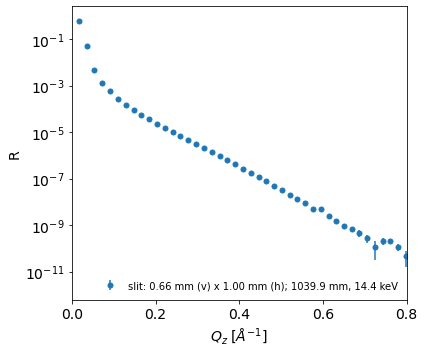

In [ ]:
# Final Two Graphs Below
refl_recSlit = np.array(refl_recSlit)

# Close any existing figure named 'refl'
plt.close('refl')

# Create new figure
fig, ax = plt.subplots(num='refl', figsize=(6, 5))
fig.canvas.manager.set_window_title('refl')

# Plot error bars
# Commented line corresponds to the MATLAB commented errorbar line
# ax.errorbar(GIXOS['refl'][:,0], GIXOS['refl'][:,1]/RFscaling, yerr=GIXOS['refl'][:,2]/RFscaling,
#             fmt='o', markersize=3,
#             label=f"δQ_xy= {geo['RqxyHW']:.1e} Å⁻¹")

ax.errorbar(
    refl_recSlit[:, 0],
    refl_recSlit[:, 1] / RFscaling,
    yerr=refl_recSlit[:, 2] / RFscaling,
    fmt='o',
    markersize=5,
    label=(
        f"slit: {xrr_config_slit_v:.2f} mm (v) x {xrr_config_slit_h:.2f} mm (h); "
        f"{xrr_config_sdd:.1f} mm, {xrr_config_energy / 1000:.1f} keV"
    )
)

ax.set_xlim(0, 0.8)
ax.set_xlabel(r'$Q_z \; [\AA^{-1}]$', fontsize=14)
ax.set_ylabel('R', fontsize=14)

ax.tick_params(axis='both', which='major', labelsize=14, direction='out')
ax.set_xticks(np.arange(0, 0.81, 0.2))
ax.set_yscale('log')
ax.legend(loc='lower right', frameon=False)  # 'Southeast' → 'lower right' in matplotlib

plt.tight_layout()

# Save figure
filename = f"{path_out}{sample}_{scan[qxy0_select_idx]:05d}_R_PYTHON.jpg"
plt.savefig(filename, dpi=300)
plt.show()


/Users/xiaogangyang/miniforge3/envs/general-data/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/xiaogangyang/miniforge3/envs/general-data/lib/python3.10/site-packages/numpy/ma/core.py:3375: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval


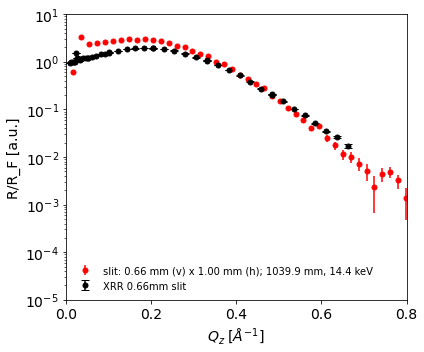

In [ ]:
# Ensure relevant arrays are numpy arrays
refl_recSlit = np.array(refl_recSlit)
fresnel = np.array(fresnel)
xrr_data_data = np.array(xrr_data)

# Close existing figure named 'RRF'
plt.close('RRF')

fig, ax = plt.subplots(num='RRF', figsize=(6, 5))
fig.canvas.manager.set_window_title('RRF')

# Plot first errorbar: refl_recSlit normalized by fresnel and RFscaling
ax.errorbar(
    refl_recSlit[:, 0],
    refl_recSlit[:, 1] / fresnel[:, 1] / RFscaling,
    yerr=refl_recSlit[:, 2] / fresnel[:, 1] / RFscaling,
    fmt='ro',
    markersize=5,
    linewidth=1.5,
    label=(
        f"slit: {xrr_config_slit_v:.2f} mm (v) x {xrr_config_slit_h:.2f} mm (h); "
        f"{xrr_config_sdd:.1f} mm, {xrr_config_energy / 1000:.1f} keV"
    )
)

# Plot second errorbar: xrr_data normalized by dataRF
ax.errorbar(
    xrr_data_data[:, 0],
    xrr_data_data[:, 1] / xrr_config_dataRF,
    yerr=xrr_data_data[:, 2] / xrr_config_dataRF,
    fmt='ko',
    markersize=5,
    linewidth=1.5,
    capsize=4,
    label='XRR 0.66mm slit'
)

ax.set_xlim(0, 0.8)
ax.set_ylim(1e-5, 10)
ax.set_xlabel(r'$Q_z \; [\AA^{-1}]$', fontsize=14)
ax.set_ylabel('R/R_F [a.u.]', fontsize=14)

ax.tick_params(axis='both', which='major', labelsize=14, direction='out')
ax.set_xticks(np.arange(0, 0.81, 0.2))
ax.set_yscale('log')
ax.legend(loc='lower left', frameon=False)  # MATLAB 'SouthWest' ≈ matplotlib 'lower left'

plt.tight_layout()

filename = f"{path_out}{sample}_{scan[qxy0_select_idx]:05d}_RRF_PYTHON.jpg"
plt.savefig(filename, dpi=300)
plt.show()
